# Greek Parliament Proceedings

You will work with a dataset containing Greek Parliament proceedings, available at <https://zenodo.org/record/2587904>. The dataset is described in Zenodo; you can also read <https://lab.imedd.org/en/parliamentary-minutes-from-1989-until-today/>.

---

> Panos Louridas, Associate Professor <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> louridas@aueb.gr


## Data Selection and Preparation

As you will find out, the dataset is extensive, as it contains three decades worth of parliamentary proceedings. You can restrict yourself to a subset of the dataset, however that subset must not be trivial. Also keep in mind that a dataset that is too small may be fast to process, but may not be enough to produce good results.

You are free to preprocess the data in any way that seems meaningful and that is likely to be conducive to good results. For instance, you may or may not remove punctuation, stopwords, very frequent or very rare words, etc. You can use any library for preprocessing, like [NLTK](https://www.nltk.org/) or [spaCy](https://spacy.io/); spaCy is more modern and faster. When developing the neural network solution you may do the preprocessing beforehand and / or using the TensorFlow facilities.

In [1]:
#necessary imports for conection with drive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
import pandas as pd
import numpy as np
import seaborn


import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#df = pd.read_csv('Greek_Parliament_Proceedings_1989_2019.csv') 
df = pd.read_csv('https://zenodo.org/record/2587904/files/Greek_Parliament_Proceedings_1989_2019.csv.zip?download=1',compression='zip') 

In [4]:
df.head(3)

,member_name,sitting_date,parliamentary_period,parliamentary_session,parliamentary_sitting,political_party,speaker_info,speech
0,κρητικος νικολαου παναγιωτης,1989-07-03,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να σ...
1,κρητικος νικολαου παναγιωτης,1989-07-03,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Παρακαλείται ο κύριος Γραμματέας να συνοδεύσε...
2,κρητικος νικολαου παναγιωτης,1989-07-03,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,"Κύριοι συνάδελφοι, παρακαλώ τη Βουλή να εξουσ..."


Checking for empty string in the column speech

In [5]:
print(df[df['speech']==''].size)

0


Checking for null in speech column

In [6]:
print(df[df['speech'].isnull()].size)

80


We won't remove these rows. For our initial analyses we don't need the actual text. We'll deal with them later on

let's see the parties, to ensure no duplicates w/ similar name are here

In [7]:
prts = df['political_party'].unique()
prts

array(['πανελληνιο σοσιαλιστικο κινημα', 'βουλη', 'νεα δημοκρατια',
       'κομμουνιστικο κομμα ελλαδας εσωτερικου',
       'κομμουνιστικο κομμα ελλαδας',
       'συνασπισμος της αριστερας των κινηματων και της οικολογιας', nan,
       'λαικος ορθοδοξος συναγερμος',
       'οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων εναλλακτικων οργανωσεων)',
       'ανεξαρτητοι (εκτος κομματος)', 'δημοκρατικη ανανεωση',
       'αντιπολιτευση', 'πολιτικη ανοιξη', 'δημοκρατικο κοινωνικο κινημα',
       'συνασπισμος ριζοσπαστικης αριστερας', 'δημοκρατικη αριστερα',
       'ανεξαρτητοι ελληνες - πανος καμμενος',
       'ανεξαρτητοι δημοκρατικοι βουλευτες',
       'λαικος συνδεσος - χρυση αυγη', 'το ποταμι',
       'ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια',
       'λαικη ενοτητα',
       'δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)',
       'ενωση κεντρωων'], dtype=object)

Let's check if the ανεξάρτητοι έλληνες is a duplicate, or different parties. we can filter the parties, and panos kammenos who is the party's president

In [8]:
dfprt = df[df['political_party'].isin(['ανεξαρτητοι ελληνες - πανος καμμενος', 'ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια'])]
dfprtgr = dfprt[['member_name','political_party','speech']][dfprt['member_name']=='καμμενος ηλια παναγιωτης (πανος)'].groupby(['member_name','political_party']).count()
dfprtgr

speech
member_name                      political_party                                           
καμμενος ηλια παναγιωτης (πανος) ανεξαρτητοι ελληνες - πανος καμμενος                   476
                                 ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατι...     748

He is included in both, so let's just rename one of the occurences

In [9]:
df['political_party'] = df['political_party'].replace('ανεξαρτητοι ελληνες - πανος καμμενος', 'ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια')
df['political_party'].unique()

array(['πανελληνιο σοσιαλιστικο κινημα', 'βουλη', 'νεα δημοκρατια',
       'κομμουνιστικο κομμα ελλαδας εσωτερικου',
       'κομμουνιστικο κομμα ελλαδας',
       'συνασπισμος της αριστερας των κινηματων και της οικολογιας', nan,
       'λαικος ορθοδοξος συναγερμος',
       'οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων εναλλακτικων οργανωσεων)',
       'ανεξαρτητοι (εκτος κομματος)', 'δημοκρατικη ανανεωση',
       'αντιπολιτευση', 'πολιτικη ανοιξη', 'δημοκρατικο κοινωνικο κινημα',
       'συνασπισμος ριζοσπαστικης αριστερας', 'δημοκρατικη αριστερα',
       'ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια',
       'ανεξαρτητοι δημοκρατικοι βουλευτες',
       'λαικος συνδεσος - χρυση αυγη', 'το ποταμι', 'λαικη ενοτητα',
       'δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)',
       'ενωση κεντρωων'], dtype=object)

Let's check if there is any actual meaning in the inserts with political_party 'βουλη' & 'αντιπολιτευση'

In [10]:
dfv = df[df['political_party']=='βουλη']
dfv

,member_name,sitting_date,parliamentary_period,parliamentary_session,parliamentary_sitting,political_party,speaker_info,speech
3,NaN,1989-07-03,period 5,session 1,sitting 1,βουλη,βουλευτης/ες,"Μάλιστα, μάλιστα."
10,NaN,1989-07-04,period 5,session 1,sitting 2,βουλη,βουλευτης/ες,"Μάλιστα, μάλιστα."
59,NaN,1989-07-05,period 5,session 1,sitting 3,βουλη,βουλευτης/ες,"Μάλιστα, μάλιστα."
61,NaN,1989-07-05,period 5,session 1,sitting 3,βουλη,βουλευτης/ες,"Μάλιστα, μάλιστα."
93,NaN,1989-07-06,period 5,session 1,sitting 4,βουλη,βουλευτης/ες,"Μάλιστα, μάλιστα."
...,...,...,...,...,...,...,...,...
1194086,NaN,2019-02-21,period 17 presided parliamentary republic,session 4,sitting 81,βουλη,βουλευτης/ες,"Μάλιστα, μάλιστα."
1194096,NaN,2019-02-21,period 17 presided parliamentary republic,session 4,sitting 81,βουλη,βουλευτης/ες,"Μάλιστα, μάλιστα."
1194338,NaN,2019-02-21,period 17 presided parliamentary republic,session 4,sitting 81,βουλη,βουλευτης/ες,"Μάλιστα, μάλιστα."
1194340,NaN,2019-02-21,period 17 presided parliamentary republic,session 4,sitting 81,βουλη,βουλευτης/ες,"Μάλιστα, μάλιστα."


In [11]:
dfan = df[df['political_party']=='αντιπολιτευση']
dfan

,member_name,sitting_date,parliamentary_period,parliamentary_session,parliamentary_sitting,political_party,speaker_info,speech
23962,NaN,1990-07-19,period 7,session 1,sitting 53,αντιπολιτευση,βουλευτης/ες,Δεν σας ακούμε.
37493,NaN,1990-11-08,period 7,session 1 continuation of plenary session,sitting 76,αντιπολιτευση,βουλευτης/ες,Κατά πλειοψηφία.
37512,NaN,1990-11-08,period 7,session 1 continuation of plenary session,sitting 76,αντιπολιτευση,βουλευτης/ες,Κατά πλειοψηφία.
37517,NaN,1990-11-08,period 7,session 1 continuation of plenary session,sitting 76,αντιπολιτευση,βουλευτης/ες,Κατά πλειοψηφία.
37520,NaN,1990-11-08,period 7,session 1 continuation of plenary session,sitting 76,αντιπολιτευση,βουλευτης/ες,Κατά πλειοψηφία.
68478,NaN,1991-06-19,period 7,summer '91,sitting 10,αντιπολιτευση,βουλευτης/ες,Θέλουμε αντίγραφο.
72385,NaN,1991-07-30,period 7,continuation of summer recess '91,sitting 5,αντιπολιτευση,βουλευτης/ες,"Κύριοι συνάδελφοι, δεν υπάρχει άλλος εγγεγραμ..."
79028,NaN,1991-09-26,period 7,continuation of summer recess '91,sitting 29,αντιπολιτευση,βουλευτης/ες,Είναι η τροπολογία του Υπουργείου Τουρισμού πο...
106071,NaN,1992-03-05,period 7,session 2,sitting 3,αντιπολιτευση,βουλευτης/ες,"Αίσχος, αίσχος."
234851,NaN,1997-01-13,period 9 presided parliamentary republic,session 1,sitting 56,αντιπολιτευση,βουλευτης/ες,Ψηφοφορία!


'βουλη' include no names, and from what we see they are mostly single/few words responses. 'αντιπολιτευση' only includes 11 rows, most of which with now speech meaning, so we'll remove both

In [12]:
df = df[~df['political_party'].isin(['βουλη','αντιπολιτευση'])]
df

,member_name,sitting_date,parliamentary_period,parliamentary_session,parliamentary_sitting,political_party,speaker_info,speech
0,κρητικος νικολαου παναγιωτης,1989-07-03,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να σ...
1,κρητικος νικολαου παναγιωτης,1989-07-03,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Παρακαλείται ο κύριος Γραμματέας να συνοδεύσε...
2,κρητικος νικολαου παναγιωτης,1989-07-03,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,"Κύριοι συνάδελφοι, παρακαλώ τη Βουλή να εξουσ..."
4,κρητικος νικολαου παναγιωτης,1989-07-03,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Η Βουλή παρέσχε τη ζητηθείσα εξουσιοδότηση. Μ...
5,κρητικος νικολαου παναγιωτης,1989-07-04,period 5,session 1,sitting 2,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,"Υπάρχει κανείς εκ των κυρίων συναδέλφων, ο οπ..."
...,...,...,...,...,...,...,...,...
1194401,κακλαμανης μιχαηλ νικητας,2019-02-22,period 17 presided parliamentary republic,session 4,sitting 82,νεα δημοκρατια,προεδρευων,Τα υπόλοιπα στη δευτερολογία σας.Κύριε Συντυχ...
1194402,συντυχακης δανιηλ εμμανουηλ,2019-02-22,period 17 presided parliamentary republic,session 4,sitting 82,κομμουνιστικο κομμα ελλαδας,NaN,"Κύριε Πρόεδρε, οι καταστροφές προφανώς δεν ήτ..."
1194403,κακλαμανης μιχαηλ νικητας,2019-02-22,period 17 presided parliamentary republic,session 4,sitting 82,νεα δημοκρατια,προεδρευων,"Ορίστε, κύριε Υπουργέ, έχετε τον λόγο."
1194404,κακλαμανης μιχαηλ νικητας,2019-02-22,period 17 presided parliamentary republic,session 4,sitting 82,νεα δημοκρατια,προεδρευων,"Αρκεί και το κεντρικό κράτος, κύριε Υπουργέ, ..."


It is a consious choice not to merge 'συνασπισμός ριζοσπαστικης αριστεράς' with 'συνασπισμος της αριστερας των κινηματων και της οικολογιας	'
<br> That is, since the latter one was included in the former, when it consisted of a political coalition, but was actually dissolved before SYRIZA was turned into a unified political party
<br> The same goes for 'πανελληνιο σοσιαλιστικο κινημα' and 'δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)', since the latter one was consisted mainly of the former, but also include another small party 'δημοκρατικη αριστερα')

We'll also turn date data into date type

In [13]:
df['sitting_date'] = pd.to_datetime(df['sitting_date'], format="%Y-%m-%d")
df['sitting_date'][9500]
df.dtypes

member_name                      object
sitting_date             datetime64[ns]
parliamentary_period             object
parliamentary_session            object
parliamentary_sitting            object
political_party                  object
speaker_info                     object
speech                           object
dtype: object

Checking for null in political_party column

In [14]:
df3 = df[df['political_party'].isnull()]
df3.size

1296

In [15]:
df.size

9188160

These data represent about 0.01% of the dataset, so we won't get into the trouble to fix them. We will remove them accordingly when the party variable is of importance to our analyses.

Let's take a look at what the speaker_info can give us

In [16]:
print(df['speaker_info'].unique().size)
print(df['speaker_info'].unique()[0:15])


1272
['προεδρευων' 'προεδρος' nan
 'προεδρος της κυβερνησης και υπουργος των εξωτερικων' 'βουλευτης/ες'
 'υπουργος υγειας, προνοιας και κοινωνικων ασφαλισεων'
 'αρχηγος της νεας δημοκρατιας'
 'προεδρος της κυβερνησης και υπουργος εξωτερικων'
 'προεδρος του συνασπισμου της αριστερας και της προοδου'
 'υπουργος δημοσιας ταξης' 'υπουργος προεδριας της κυβερνησης'
 'προεδρος της δημοκρατικης ανανεωσης' 'υπουργος οικονομικων'
 'υπουργος εθνικης αμυνας' 'δημοσιας ταξης']


## Data Exploration

* Expore the dataset to get an overall idea of what it is about. Think about:

  * Speeches per party.
  
  * Speeches over time.
  
  * Speeches per party and time.
  
  * Speakers per party.
  
  * Etc.
  
* Your analysis can (and should) include tables and diagrams.

Let's see speeches per party

In [17]:
spp = df[['political_party','speech']].groupby('political_party').count().sort_values(by='speech', ascending=False)
spp

,speech
political_party,
νεα δημοκρατια,385634
πανελληνιο σοσιαλιστικο κινημα,377680
συνασπισμος ριζοσπαστικης αριστερας,126572
κομμουνιστικο κομμα ελλαδας,78631
συνασπισμος της αριστερας των κινηματων και της οικολογιας,35891
ανεξαρτητοι (εκτος κομματος),29951
λαικος ορθοδοξος συναγερμος,23686
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα),22991
ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια,19306


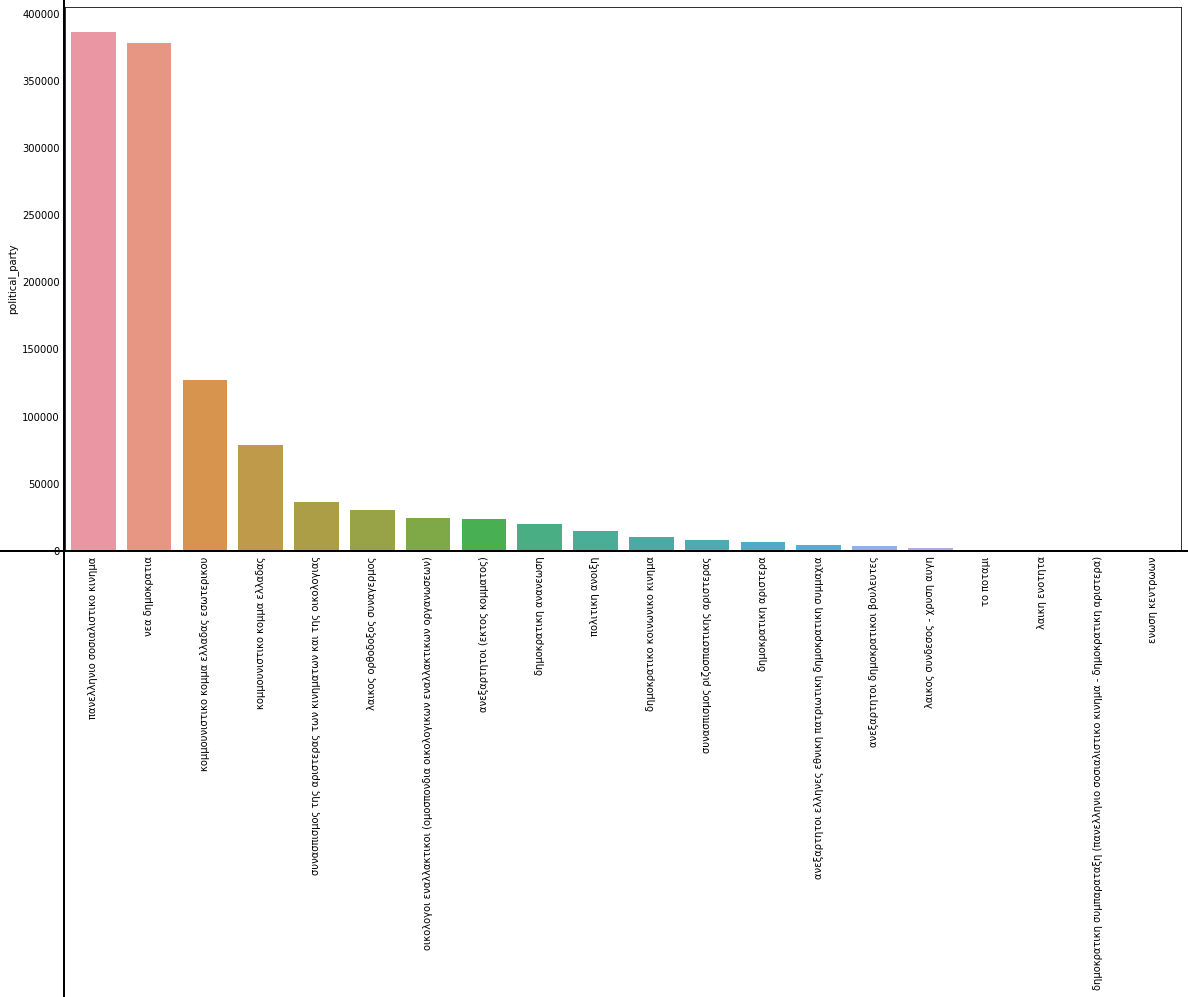

In [18]:
fig = plt.figure(figsize=(20,10))
b = sns.barplot(x=df['political_party'][~df['political_party'].isna()].unique(), y=df['political_party'].value_counts())
b.tick_params( width=3000, length=2)
plt.xticks(rotation = 90)
plt.show()

These are heavily imbalanced. Maybe we'll need to find a way to deal with this later on

<br> We know some parties have been in the parliament for more time than others. Let's see the "intensity" of their speaches,that being how many speeches they have per parliamentary period

In [19]:
sppi1 = df[['political_party', 'parliamentary_period','speech']].groupby(['political_party','parliamentary_period']).count().sort_values(by='speech', ascending= False).reset_index()
sppi1 = sppi1[['political_party','speech']].groupby('political_party').mean().sort_values(by='speech', ascending = False).reset_index()
sppi1

,political_party,speech
0,πανελληνιο σοσιαλιστικο κινημα,31473.333333
1,νεα δημοκρατια,29664.153846
2,συνασπισμος ριζοσπαστικης αριστερας,15821.500000
3,δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστι...,11495.500000
4,ενωση κεντρωων,9888.000000
5,κομμουνιστικο κομμα ελλαδας,6552.583333
6,δημοκρατικο κοινωνικο κινημα,6056.000000
7,λαικος συνδεσος - χρυση αυγη,4724.000000
8,συνασπισμος της αριστερας των κινηματων και τη...,3987.888889
9,ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατ...,3861.200000


We see that PASOK and NEA DIMOKRATIA have the bigger values here as well. This is to be expected, since thhey have been interchengably the governing parties, until 2015.


Let's see now, how speeches correlate with time, to see if there were specific points in time with intensive discussions

In [20]:
dfts = df[['sitting_date', 'speech']].groupby('sitting_date').count()

In [21]:
dfts2 = dfts.reset_index()

In [22]:
dfts3 = df[['sitting_date', 'member_name']][~df.duplicated()].groupby('sitting_date').count().reset_index()
dfts3

,sitting_date,member_name
0,1989-07-03,4
1,1989-07-04,6
2,1989-07-05,47
3,1989-07-06,31
4,1989-07-07,343
...,...,...
4769,2019-02-18,3
4770,2019-02-19,206
4771,2019-02-20,235
4772,2019-02-21,377


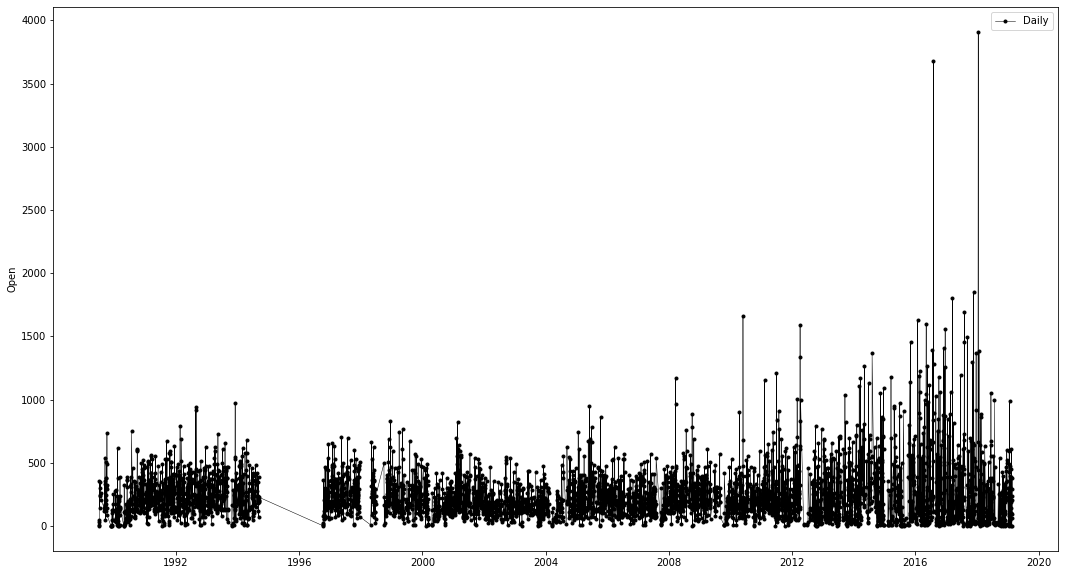

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18, 10))
ax.plot(dfts['speech'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='black')
ax.set_ylabel("Open")
ax.legend()

That's something, but the range is so big that the data is very cluttered. Let's use bokeh to interactively go through specific parts. <br> We'll also plot the number of speakers. That way we can see if large conversations were a result of a large participation, or a conversation between specific members of the parliament (hover tool has been disabled, since it couldn't read correctly the actual date, despite multiple attempts for re-formatting, and no obvious troubleshooting as for the data type)

In [24]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource, HoverTool

source = ColumnDataSource(data = {'dates' : dfts2['sitting_date'], 'speeches' : dfts2['speech'] })
source2 = ColumnDataSource(data = {'dates' : dfts3['sitting_date'], 'member_name' : dfts3['member_name'] })
p = figure(plot_width=900, plot_height=550, x_axis_type="datetime")

p.line('dates', 'speeches', color='navy', legend_label='avg', source = source)
p.line('dates', 'member_name', color='olive', legend_label='avg', source = source2)

p.title.text = "Speeches per date"
p.legend.location = "top_left"
p.grid.grid_line_alpha = 1
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'No of Speeches'

#hover = HoverTool(mode = 'vline')
#hover.tooltips = [('date', '@dates')]
#hover.formatters = {'date': 'datetime'}
#p.add_tools(hover)
# show the results
output_notebook()
show(p)

Now, let's see which parties were active during each year

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


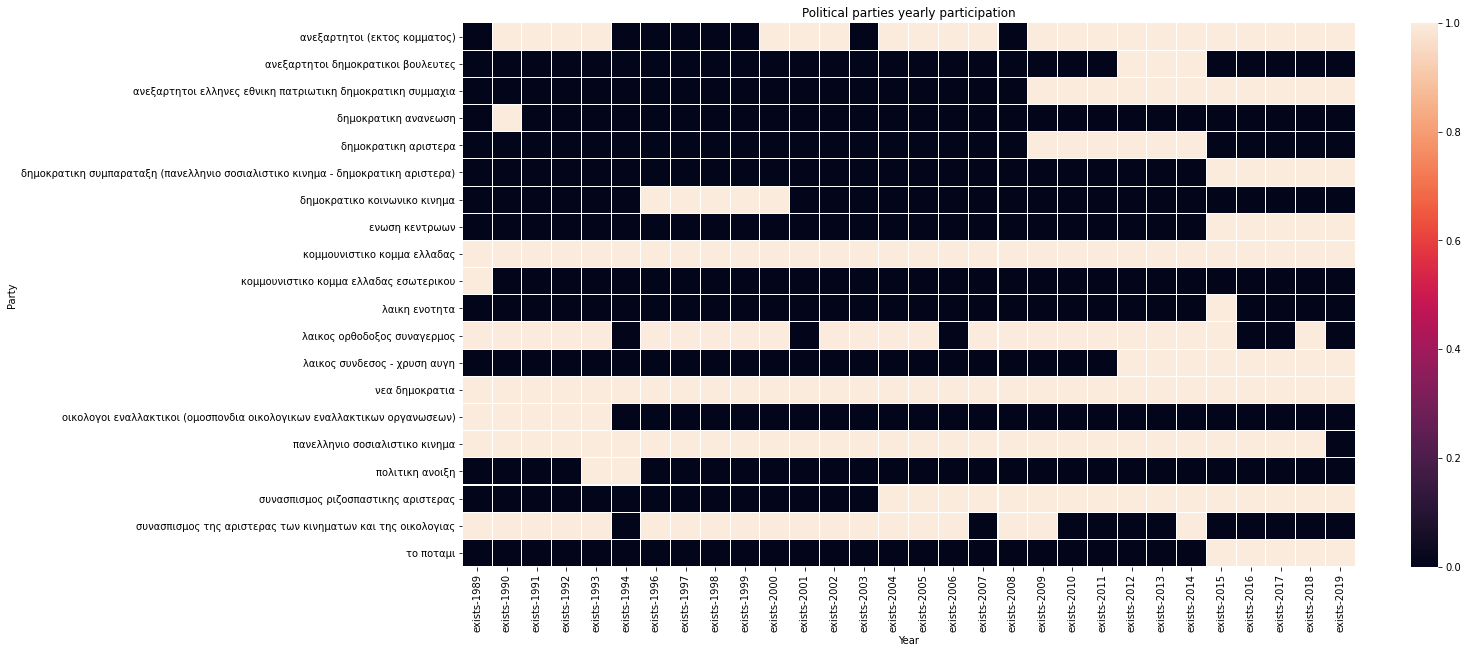

In [25]:
ppy = df[['political_party','sitting_date']]
ppy['sitting_year'] = ppy['sitting_date'].dt.year
ppy = ppy[['political_party','sitting_year']]
ppy = ppy[~ppy.duplicated()]
ppy['exists'] = 1
#ppy.groupby('sitting_year')
ppy = ppy.pivot(index="political_party", columns="sitting_year").fillna(0).reset_index().dropna()
ppy = ppy.set_index('political_party')


fig, ax = plt.subplots(figsize=(20,10))
seaborn.heatmap(ppy, linewidths=.05)
ax.set_title('Political parties yearly participation')
ax.set_xlabel('Year')
ax.set_ylabel('Party')
plt.show()

We'll proceed to some changes. We see 'δημοκρατική συμπαράταξη' seems active till today. However, we know it was dissolved in 2018, when PASOK once again ran independently on the elections. As such, and since it was a significantly larger party, we will unify the two. It is not 100% accurate, but it makes more sense <br>
Also, given the large size of the df, we will focus on the speeches from 2004 and later on. That way, since Syriza, an important party of the current parliament was present. We also immediately get rid of parties with minor prior participation, and we will go on and remove the parties that for the remaining dates have less than 0.5% of the speeches

In [26]:
df['political_party'] = df['political_party'].replace( 'δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)','πανελληνιο σοσιαλιστικο κινημα')
df['political_party'].unique()

array(['πανελληνιο σοσιαλιστικο κινημα', 'νεα δημοκρατια',
       'κομμουνιστικο κομμα ελλαδας εσωτερικου',
       'κομμουνιστικο κομμα ελλαδας',
       'συνασπισμος της αριστερας των κινηματων και της οικολογιας', nan,
       'λαικος ορθοδοξος συναγερμος',
       'οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων εναλλακτικων οργανωσεων)',
       'ανεξαρτητοι (εκτος κομματος)', 'δημοκρατικη ανανεωση',
       'πολιτικη ανοιξη', 'δημοκρατικο κοινωνικο κινημα',
       'συνασπισμος ριζοσπαστικης αριστερας', 'δημοκρατικη αριστερα',
       'ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια',
       'ανεξαρτητοι δημοκρατικοι βουλευτες',
       'λαικος συνδεσος - χρυση αυγη', 'το ποταμι', 'λαικη ενοτητα',
       'ενωση κεντρωων'], dtype=object)

In [27]:
df = df[df['sitting_date'].dt.year >= 2004]

In [28]:
partygroup = df[['political_party','speech']].groupby('political_party').count().reset_index()
partygroup.shape[0]

14

In [29]:
partygroup = partygroup[partygroup['speech'] > df.shape[0]*0.5/100]
partygroup.shape[0]

11

In [30]:
df = df[df['political_party'].isin(partygroup['political_party'])]

Let's see which parties we have left, and how their speeches are spread

In [31]:
df['political_party'].unique()

array(['κομμουνιστικο κομμα ελλαδας', 'πανελληνιο σοσιαλιστικο κινημα',
       'νεα δημοκρατια', 'συνασπισμος ριζοσπαστικης αριστερας',
       'ανεξαρτητοι (εκτος κομματος)', 'λαικος ορθοδοξος συναγερμος',
       'δημοκρατικη αριστερα',
       'ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια',
       'λαικος συνδεσος - χρυση αυγη', 'το ποταμι', 'ενωση κεντρωων'],
      dtype=object)

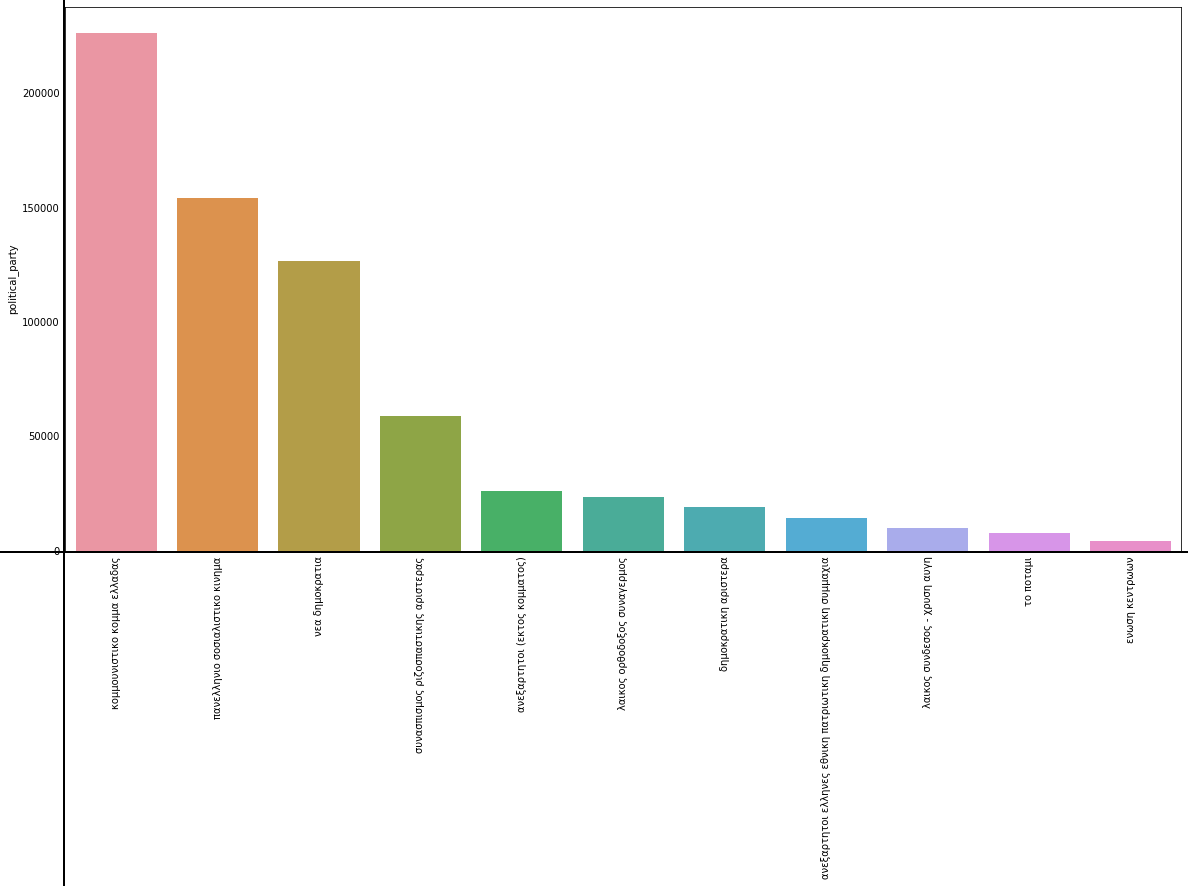

In [32]:
fig = plt.figure(figsize=(20,10))
b = sns.barplot(x=df['political_party'][~df['political_party'].isna()].unique(), y=df['political_party'].value_counts())
b.tick_params( width=3000, length=2)
plt.xticks(rotation = 90)
plt.show()

Our over-representation of the bigger parties is way better than before. We have reduced over-proportionately speeches of the larger parties, since many of the currently represented are newer to the political scene.
<br><br> Our last party removal step, will be of the independent representatives. That is, since they are mostly people who were erased by or resigned from their party. As such, they do not offer much knowledge, since they originally come from different parties. 

In [33]:
df = df[~df['political_party'].isin(["ανεξαρτητοι (εκτος κομματος)"])]
df['political_party'].unique()

array(['κομμουνιστικο κομμα ελλαδας', 'πανελληνιο σοσιαλιστικο κινημα',
       'νεα δημοκρατια', 'συνασπισμος ριζοσπαστικης αριστερας',
       'λαικος ορθοδοξος συναγερμος', 'δημοκρατικη αριστερα',
       'ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια',
       'λαικος συνδεσος - χρυση αυγη', 'το ποταμι', 'ενωση κεντρωων'],
      dtype=object)

Now that we've cleared our parties, let's map them to integers to improve our analyses speed

In [34]:
partylist = df['political_party'].unique()
partylist = partylist.tolist()
df['political_id'] = df['political_party'].apply(lambda x: partylist.index(x))
df = df.reset_index(drop=True)

In [35]:
print(df['political_id'][0])
print(df['political_party'][0])
print(partylist[0])

0
κομμουνιστικο κομμα ελλαδας
κομμουνιστικο κομμα ελλαδας


Let's get a bit deeper to our words' analytics. <br>NOTE: This analysis is written after running initial classification models and while approaching the neural network models' implementation<br><br> (The cli module is imported, because google colab couldn't locate the el_core_news_sm model if it was downloaded through bash commands)

In [36]:
import spacy
import nltk
nltk.download('punkt')
import spacy.cli
spacy.cli.download("el_core_news_sm")
sp = spacy.load('el_core_news_sm')
from nltk.tokenize import word_tokenize
import string

all_stopwords = sp.Defaults.stop_words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [37]:
def tokstoprem(text):
    text_tokens = word_tokenize(text)
    tokens_without_sw = []
    for word in text_tokens:
        word = word.lower()
        if ((not word in all_stopwords) & (not word in string.punctuation) & (not word.isnumeric()) & ( word.isalnum())):
            tokens_without_sw.append(word)
    #tokens_without_sw= [word.lower() for word in text_tokens if ((not word in all_stopwords) & (not word in string.punctuation) & (not word.isnumeric()))]
    return tokens_without_sw
tester0 = tokstoprem(df['speech'][0])
print(df['speech'][0])
tester0

 Σε δύο ενότητες πότε, κύριε Υπουργέ; Σήμερα;


['δύο', 'ενότητες', 'κύριε', 'υπουργέ', 'σήμερα']

In [38]:
df = df.dropna(subset=['speech'])
df['speech_tokened'] = df['speech'].apply(lambda x: tokstoprem(x))

Now let's go a bit further, and see the length of each sentence. This will help us decide the max length of each sentence before we encode them to numerical and import our padding, when we classify with neural networks

In [39]:
df['speech_tokened'].apply(lambda x: len(x)).describe(percentiles=[0.2, 0.25,0.5,0.75,0.9, .95])

count    645193.000000
mean         64.620822
std         161.743587
min           0.000000
20%           2.000000
25%           2.000000
50%           6.000000
75%          30.000000
90%         208.000000
95%         404.000000
max        9054.000000
Name: speech_tokened, dtype: float64

<br>An important result we get from this statistical analysis, is the fact that at least 20% of our speeches are up to 2 words long.
<br> It is thought that no much meaning can be received from such speeches. Let's print some

In [40]:
df['speech_tokened'][df['speech_tokened'].apply(lambda x: len(x)) <= 2].head(60)

7         [νικολόπουλος, λόγο]
9                 [ετερόκλητα]
15              [τζέκης, λόγο]
17        [αλογοσκούφης, λόγο]
33                 [κυβέρνηση]
35       [θεσμοί, εκδικούνται]
37        [νικολόπουλος, λόγο]
39                 [διαγραφεί]
51             [διακυβέρνησης]
52                     [άποψή]
53                     [ναούς]
58            [βρέντζος, λόγο]
62     [νομοσχεδίου, παρακαλώ]
66         [κουρουμπλής, λόγο]
82              [τζέκης, λόγο]
84           [λαφαζάνης, λόγο]
85        [νικολόπουλος, λόγο]
88            [κυρία, πρόεδρε]
91        [αλογοσκούφης, λόγο]
96                [πλειοψηφία]
97                [πλειοψηφία]
99                [πλειοψηφία]
100               [πλειοψηφία]
102               [πλειοψηφία]
103               [πλειοψηφία]
105               [πλειοψηφία]
106               [πλειοψηφία]
108               [πλειοψηφία]
109               [πλειοψηφία]
111               [πλειοψηφία]
112               [πλειοψηφία]
114               [πλειοψηφία]
115     

Indeed, most of these entries are common words, or maybe even speech seperation mistakes. Let's see what we can get on the 3-4 tokens' speeches

In [41]:
df[['member_name','political_party','speech_tokened','speaker_info']][df['speech_tokened'].apply(lambda x: len(x)).isin([3,4])].head(60)

,member_name,political_party,speech_tokened,speaker_info
3,σγουριδης σγουρη παναγιωτης,πανελληνιο σοσιαλιστικο κινημα,"[ορίστε, κύριε, βλαχόπουλε, λόγο]",προεδρευων
5,σγουριδης σγουρη παναγιωτης,πανελληνιο σοσιαλιστικο κινημα,"[ανεξάρτητο, εργασιών, κοινοβουλίου]",προεδρευων
14,νικολοπουλος ιωαννου νικολαος,νεα δημοκρατια,"[ακούσουμε, άποψη, κομμουνιστικού, κόμματος]",NaN
22,αλογοσκουφης σπυριψων γεωργιος,νεα δημοκρατια,"[σύμφωνοι, συζητηθεί, κεφάλαιο, σήμερα]",NaN
27,σγουριδης σγουρη παναγιωτης,πανελληνιο σοσιαλιστικο κινημα,"[ορίστε, κύριε, υπουργέ, λόγο]",προεδρευων
40,νικολοπουλος ιωαννου νικολαος,νεα δημοκρατια,"[ευχαριστώ, κύριε, πρόεδρε]",NaN
41,σγουριδης σγουρη παναγιωτης,πανελληνιο σοσιαλιστικο κινημα,"[διαγράφηκε, λόγο, τζέκης]",προεδρευων
43,σγουριδης σγουρη παναγιωτης,πανελληνιο σοσιαλιστικο κινημα,"[κανονικά, οκτώ, λεπτά, χρόνος]",προεδρευων
44,τζεκης κωνσταντινου αγγελος,κομμουνιστικο κομμα ελλαδας,"[οκτώ, λεπτά, κύριε, πρόεδρε]",NaN
45,σγουριδης σγουρη παναγιωτης,πανελληνιο σοσιαλιστικο κινημα,"[οκτώ, λεπτά, βάσει, κανονισμού]",προεδρευων


These are all typicalities, of giving and receiving the floor. Also, since the one communicator is always the president of the parliament, it gives a huge load of speeches to ND and PASOK (and in some extent SYRIZA).
What we will do is remove these, see the size of the speeches and the individual words (to get the samples - features aspect) and decide whether it is satisfactory.
<br> In a different case, we will proceed to re-include older speeches, which are also long enough to provide some meaning

In [42]:
df[['member_name','political_party','speech_tokened','speaker_info']][df['speech_tokened'].apply(lambda x: len(x)) == 5].head(60)

,member_name,political_party,speech_tokened,speaker_info
0,τζεκης κωνσταντινου αγγελος,κομμουνιστικο κομμα ελλαδας,"[δύο, ενότητες, κύριε, υπουργέ, σήμερα]",NaN
1,σγουριδης σγουρη παναγιωτης,πανελληνιο σοσιαλιστικο κινημα,"[ενότητα, σήμερα, δεύτερη, τροπολογίες, υπάρχουν]",προεδρευων
8,νικολοπουλος ιωαννου νικολαος,νεα δημοκρατια,"[κανονικά, έπρεπε, συζητήσουμε, άρθρα, ενότητες]",NaN
13,σγουριδης σγουρη παναγιωτης,πανελληνιο σοσιαλιστικο κινημα,"[τροπολογία, είπαμε, πάει, μιλάμε, τροπολογία]",προεδρευων
21,τζεκης κωνσταντινου αγγελος,κομμουνιστικο κομμα ελλαδας,"[μπορούμε, συζητήσουμε, σήμερα, κεφάλαιο, νομο...",NaN
42,κεδικογλου συμεων βασιλειος,πανελληνιο σοσιαλιστικο κινημα,"[λίγος, χρόνος, κύριε, πρόεδρε, άρθρα]",NaN
47,κουρουμπλης ελευθεριου παναγιωτης,πανελληνιο σοσιαλιστικο κινημα,"[βουλευτές, γραφεί, μιλήσουν, κύριε, πρόεδρε]",NaN
54,κεδικογλου συμεων βασιλειος,πανελληνιο σοσιαλιστικο κινημα,"[μονή, ναός, ναός, νομικό, πρόσωπο]",NaN
70,μπενακη-ψαρουδα ευαγγελου αννα,νεα δημοκρατια,"[υφυπουργός, οικονομίας, απόστολος, φωτιάδης, ...",προεδρευων
78,μητσοτακης κυριακου κωνσταντινος,νεα δημοκρατια,"[πλήρωσαν, απηλλάγησαν, διότι, παραγράφηκαν, ο...",NaN


We see that when we add a 5th word to the speech, different meanings start to form. As such, we will only remove up to 4 tokens speeches (tokens counted after stopword removal)

In [43]:
df = df[df['speech_tokened'].apply(lambda x: len(x)) > 4]

In [44]:
len(df)

372707

So, we have almost 400.000 samples. Let's see now what happens with our features, our individual words, which will be our dictionary

In [45]:
from collections import Counter

counter  = Counter()
for i in df['speech_tokened']:
    counter.update(i)
print([x for x in counter.most_common(30)])

[('κύριε', 317671), ('ή', 198133), ('υπάρχει', 170442), ('σήμερα', 155665), ('κυβέρνηση', 150663), ('συνάδελφοι', 150079), ('κύριοι', 149169), ('λόγο', 127595), ('πρόεδρε', 118895), ('υπουργέ', 114708), ('άρθρο', 113998), ('θέμα', 109484), ('δύο', 105519), ('χώρα', 104211), ('χρόνια', 103525), ('αφορά', 101602), ('ευχαριστώ', 100170), ('νομοσχέδιο', 99488), ('ευρώ', 98870), ('πολιτική', 98020), ('πω', 94626), ('γίνεται', 91366), ('κυρίες', 90289), ('υπάρχουν', 88445), ('κάνει', 88374), ('διότι', 84768), ('γίνει', 83929), ('σ', 75967), ('ελλάδα', 71944), ('νέα', 71673)]


There are quite common words, but it would actually be a never-ending spiral of what consitutes a "meaninful" token within the political context, without trial and error (out of our scope for now). We'll just assume that since the usage is so often, pretty much everyone uses them. In our traditional ML models, we'll even limit the document frequency, so trivial tokens will be removed anyways :)<br><br>
An interesting concept would be to differently treat the text within the greek quotation marks (removed earlier, since we have filtered out any non alphanumerical words),since it might be a bit confusing for our models, in case the quotations include phrases previously used by other parties (eg. refering to a sentence before responding to it). We could also extract it to a different column, and import it as seperate input to our models, in case we find any pattern on what different political parties tend to refer to. We will not be doing this however, due to time limitations. Just food for thought as next steps. We might update our stopwords, and re-filter our tokens before feeding them to our NN models, but not quite yet

In [46]:
len(counter)

316411

We have about 300k words in total. We'll have to kep that in mind, since they only give a ratio of samples/features of 1.x <br>
We might need to find a rule for features reduction later on. However, as stated before, our traditional ML is protected by the max_df parameter, and we can define our own vocab size. Not time for such considerations yet. Let's see however the most common ones

In [47]:
counter.most_common(50)

[('κύριε', 317671),
 ('ή', 198133),
 ('υπάρχει', 170442),
 ('σήμερα', 155665),
 ('κυβέρνηση', 150663),
 ('συνάδελφοι', 150079),
 ('κύριοι', 149169),
 ('λόγο', 127595),
 ('πρόεδρε', 118895),
 ('υπουργέ', 114708),
 ('άρθρο', 113998),
 ('θέμα', 109484),
 ('δύο', 105519),
 ('χώρα', 104211),
 ('χρόνια', 103525),
 ('αφορά', 101602),
 ('ευχαριστώ', 100170),
 ('νομοσχέδιο', 99488),
 ('ευρώ', 98870),
 ('πολιτική', 98020),
 ('πω', 94626),
 ('γίνεται', 91366),
 ('κυρίες', 90289),
 ('υπάρχουν', 88445),
 ('κάνει', 88374),
 ('διότι', 84768),
 ('γίνει', 83929),
 ('σ', 75967),
 ('ελλάδα', 71944),
 ('νέα', 71673),
 ('δημοκρατίας', 70651),
 ('θέλω', 69077),
 ('χώρας', 68409),
 ('υπουργός', 67496),
 ('συζήτηση', 64835),
 ('τρόπο', 63785),
 ('λέει', 62665),
 ('κι', 62406),
 ('νέας', 61977),
 ('βεβαίως', 59419),
 ('βουλή', 58825),
 ('πρόβλημα', 58770),
 ('επιτροπή', 58174),
 ('υπουργείο', 58049),
 ('υπουργό', 57322),
 ('στιγμή', 57101),
 ('κυρία', 54800),
 ('ό', 54415),
 ('κυβέρνησης', 54369),
 ('κάνουμε',

Now, let's see how the unique words in each speech are stastitically spread

In [48]:
df['speech_set'] = df['speech_tokened'].apply(lambda x: (set(x)))
df['speech_set'].apply(lambda x: len(x)).describe(percentiles=[0.25,0.5,0.75,0.9, .95])

count    372707.000000
mean         84.123521
std         138.861825
min           2.000000
25%           7.000000
50%          18.000000
75%         101.000000
90%         278.000000
95%         382.000000
max        2672.000000
Name: speech_set, dtype: float64

And let's see how many document frequency we have for each word, a metric that will help us set a better value to the max_df parameter of our traditional ML models

In [49]:
counter1  = Counter()
for i in df['speech_set']:
    counter1.update(i)

In [50]:
pd.DataFrame.from_dict(dict(counter1), orient='index').describe(percentiles=[0.25,0.5,0.75,0.8, 0.9,  0.92, .95,  0.97 ,.98,.985, .99])

,0
count,316411.000000
mean,99.090819
std,1040.031029
min,1.000000
25%,1.000000
50%,3.000000
75%,13.000000
80%,22.000000
90%,81.000000
92%,117.000000


80% of the words appear in up to 22 documents.
<br>Based on the above results, we'll use as a starting point, a vocab based on 3-5% of our total terms when training our NN models (so well try to start with a 20k vocabulary)
<br> The last table also suggests that our initial attempts to traditional ML models, with min_df hyperparameter set to a percentage of the total documents (.1, .05), was way too strict and limited down on way too few words.
<br> (NOTE: the initial attempts were set before the word-level pre-processing, making it even more strict)

## Classification without Neural Networks

* Train at least two non-neural network algorithms to learn to classify a speech. The target variable should be the political party of the speaker.

* If a party does not have enough support (in the Machine Learning sense, i.e., too few speeches), you may excise it from the dataset if you detect that you cannot get results for it.

* You should split your data to training and testing datasets, try the different algorithms with cross validation on the training dataset, and find the best hyperparameters for the best algorithm. Note that parameters for bag of words and tf-idf construction can be very important.

* Report your scores; once you find the best algorithm and the best hyperparameters, report the score on the test data.

* To gauge the efficacy of the algorithm, report also the results of a baseline classifier, using, for instance, scikit-learn's [`DummyClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html).

Let's now remove the rows without a political_party, since we can't either train or test our algorithms with these rows. We'll do the same with the empty speeches

In [51]:
df = df[~df['political_party'].isnull()]
df = df[~df['speech'].isnull()].reset_index()
df.shape[0]

372707

First, we will pre-process our data a bit more, paying attention to the speeches
<br> <br>
(NOTE: This is an earlier version of pre-processing, attempting to stem/lemmatize. After these attempts failed, we went on to use the embeded pre-processing capabilities of the vectorizer, got some results, and ended up pre-processing the data on a word-level with the methods already ran above. As such, the following pieces of code will not be actively used, but are left here, to show the thought process)

Let's see if the accent stripper of the vectorizer actually removes the accents from greek characters

In [52]:
import unicodedata
unicodedata.normalize('NFKD', df['speech'][0])

' Σε δύο ενότητες πότε, κύριε Υπουργέ; Σήμερα;'

Apparently it doesn't. We need to find another way to do so

We will define a funtion, called myprocess_lemma, which will apply several processing layers to the speeches.

In order to do that, we need to install cltk and greek accentuation libraries, import some modules and download the lemmatization corpus

In [53]:
import sys
!{sys.executable} -m pip install cltk
!{sys.executable} -m pip install greek-accentuation
!{sys.executable} -m pip install progress progressbar2 alive-progress tqdm

In [54]:
from cltk.tokenize.word import WordTokenizer
from greek_accentuation.characters import base
from cltk.stem.lemma import LemmaReplacer
from cltk.corpus.utils.importer import CorpusImporter
corpus_importer = CorpusImporter('greek')
corpus_importer.import_corpus('greek_models_cltk')
import string
from tqdm.auto import tqdm

Within these libraries, we find quite a few capabilities. One of these is lematization. It is not the best possible utility, since it's based on ancient and archaising forms, but it's something. Let's see how well this works

In [55]:
lemmatizer = LemmaReplacer('greek')
testdf = df['speech'][0:2]
for i in testdf:
    print(i)
    print(lemmatizer.lemmatize(i))

 Σε δύο ενότητες πότε, κύριε Υπουργέ; Σήμερα;
['σύ', 'δύο', 'ενότητες', 'ποτέ', ',', 'κύριος', 'Υπουργέ', ';', 'Σήμερα', ';']
 Τη μια ενότητα σήμερα και τη δεύτερη αύριο μαζί με τις τροπολογίες, αν υπάρχουν.
['Τη', 'μια', 'ενότητα', 'σήμερα', 'και', 'τη', 'δεύτερη', 'αύριο', 'μαζί', 'ἐγώ', 'τις', 'τροπολογίες', ',', 'αν', 'υπάρχουν.']


In the following function we tokenaize (included in the lemmatization function), lemmatize the tokens, turn them to lower and remove accents
<br>
Let's try it with a random speech.

In [56]:
df=df.reset_index()

In [57]:
def myprocess_lemma(text):
    lemmatizer = LemmaReplacer('greek')
    text = text.lower()
    tokens = lemmatizer.lemmatize(text)
    rettext = ""
    for i in tokens:
        word = ""
        for j in i:
            j = base(j)
            word = word+j
        rettext=rettext + " " + word 
    return(rettext)

teststr = df['speech'][0]
testres = myprocess_lemma(teststr)
print(teststr)
print(testres)

 Σε δύο ενότητες πότε, κύριε Υπουργέ; Σήμερα;
 συ δυο ενοτητες ποτε , κυριος υπουργε ; σημερα ;


Doesn't work great, but gets some job done. Let's see how much time this function would need for the total of our data to be processed

In [58]:
import timeit
starttime = timeit.default_timer()
myprocess_lemma(df['speech'][8])
print("The process would last "+str((timeit.default_timer() - starttime)*df.shape[0]/3600)+" hours")

The process would last 139.38083178169666 hours


Obviously, this is not a viable option. So we'll have to change our plans. Let's try spacy

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from spacy.lang.el import Greek
from spacy.lang.el.stop_words import STOP_WORDS
from cltk.stop.greek.stops import STOPS_LIST
import cltk
from tqdm.auto import tqdm

In [63]:
nlp = Greek()
tokenizer = nlp.Defaults.create_tokenizer(nlp)
starttime = timeit.default_timer()
lemma_list = []
tokens2 = tokenizer(df['speech'][456])
for token in tokens2:
  lemma_list.append(token.lemma_)
print(df['speech'][456])
print(lemma_list)
print("The process would last "+str((timeit.default_timer() - starttime)*df.shape[0]/3600)+" hours")

AttributeError: ignored

Well, apparently the default language support doesn't actually provide lematization. We get as lemma results the actual words. Let's try to load an existing pipeline, a ready model (We will keep it as a comment, so as not to crash while running all code snippets. This happens, cause our local IPython kernel does not recognize the create_tokenizer method as part of the el module. It works just fine with google colab, but returns as result the exact same sentence it receives)

In [61]:
tokenizer = sp.Defaults.create_tokenizer(nlp)
starttime = timeit.default_timer()
lemma_list = []
tokens2 = tokenizer(df['speech'][456])
for token in tokens2:
  lemma_list.append(token.lemma_)
#lemma_list = sp(df['speech'][456])
print(df['speech'][456])
print(lemma_list)
print("The process would last "+str((timeit.default_timer() - starttime)*df.shape[0]/3600)+" hours")

AttributeError: ignored

The pretrained model will not cooperate well with google colab. Unfortunately, when ran locally, it is also ineffective (will return the same sentence it got) and takes way too much time. So, we will altogether drop our lema/stem plans, and limit ourelves to the rest of available preprocessing. All the things we can do with nltk for greek language, we can internally do while vectorizing. So we will not proceed to any prior data manipulation

Since we cannot lemmatize and remove accents, we will limit ourselves to lowering the text, removing stopwords and punctuation.
<br>This can all happen within the vectorizer, so no need to do this priliminarily.

However, we will use the stopwords from the spacy model. It is quite a complete set of words

In [ ]:
spacystop = spacy.lang.el.stop_words.STOP_WORDS

In terms of preprocessing: We will use lowercasing <br>we will leave the default token identification (after taking a look at random speeches, we only found "κ." as single character word -not counting punctuation as character-, which is not quite important, and no abbrevations were identified, or are considered to exist). <br> As tested beforehand, accent removers included in tfidf do not work with do not work for greek characters. However, the stopwords from spacy also include accents, and the speeches also include accents, so it shouldn't cause any issues with this specific dataset. 

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

In [ ]:
train_set, test_set = train_test_split(df, test_size = 0.18, random_state = 42)

X_train = train_set['speech_tokened']
X_test = test_set['speech_tokened']
y_train = train_set['political_id']
y_test = test_set['political_id']

Since we'll be feeding lists to our pipeline, we need the tokenizer not to fail (expecting string). We will override it, creating our own tokenizer, which is nothing more than a dummy, returning exactly the tokens it was fed (We could define the whole pre-processing in a function, but we rather show the steps we took to finalize it.

In [ ]:
def own_token(text):
  return text

Also, all this processing and variables declaation has effectively used up most of our ram (colab ram, upt o 13gb). It is more than expected that our models will not run, so we will proceed to delete any unnecessary information.

In [ ]:
df.columns

In [ ]:
df['index'][0]

Before entering to our classification processes, let's clear as much ram as possible (multiple ram issues have occured locally, and in colab env.)<br>
NOTE: Apparently, deleting variables to allocate ram space does not work in colab environment. Local HW was not powerful enough to run the models, so this is the main reason that our project is split in three ipynb files

In [ ]:
lst= [dfprt, dfprtgr, dfv, dfan, spp, sppi1, dfts, dfts2, dfts3, ppy, partygroup]
del df['level_0']
del df['index']
del df['member_name']
del df['sitting_date']
del df['parliamentary_period']
del df['parliamentary_session']
del df['parliamentary_sitting']
del df['speaker_info']
del df['speech']
del df['speech_set']
del dfprt
del dfprtgr
del dfv
del dfan
del spp
del sppi1
del dfts
del dfts2
del dfts3
del ppy
del partygroup
del counter
del counter1
del spacystop
del tokenizer
del starttime
del lemma_list
del lemmatizer
del lst

#### Dummy Classifier

In [ ]:
dum_pip = Pipeline([ ('tfidf', TfidfVectorizer(tokenizer=own_token,lowercase=False)),
                    ('clf', DummyClassifier(strategy='most_frequent')),
                    ])
dum_clf = dum_pip.fit(X_train, y_train)
predicted = dum_clf.predict(X_test)

In [ ]:
dum_pip[0].get_feature_names()[0:1000]

In [ ]:
print(metrics.classification_report(y_test, predicted, target_names=partylist))

In [ ]:
cmdf = metrics.confusion_matrix(y_test, predicted)

In [ ]:
def conmat(matrix):
  fig, ax = plt.subplots()
  cm = matrix
  #tp = cm[1,1]
  #tn = cm[0,0]
  #fp = cm[0,1]
  #fn = cm[1,0]
  sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, ax = ax, xticklabels = partylist, yticklabels = partylist)
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted party')
  ax.set_ylabel('Actual party')
  plt.show()

In [ ]:
conmat(cmdf)

### Multinomial Naive Bayes Classifier

NOTE: setting n_jobs to -1 returns "The exit codes of the workers are {SIGKILL(-9)}" error. (when ran on google colab).<br>As such, we set it to -2, which works, and only leaves one core/thread out of usage (not that easy to find the actual number of thread on the machine we're runing on) from google colab

In [ ]:
parameters = {'tfidf__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'tfidf__max_df': (0.6, 0.7),
              'tfidf__min_df': (0.01, 0.05),
              'clf__alpha': (1e-2, 1e-3),
             }
mnb_pipe = Pipeline([ ('tfidf', TfidfVectorizer(tokenizer=own_token,lowercase=False)),
                     ('clf', MultinomialNB()),
                    ])
mnb_clf = mnb_pipe.fit(X_train, y_train)
gs_clf_mnb = GridSearchCV(mnb_clf, parameters, n_jobs=-2, cv=5)
gs_clf_mnb = gs_clf_mnb.fit(X_train, y_train)
predicted_mnb2 = gs_clf_mnb.predict(X_test)
gs_clf_mnb.best_params_

In [ ]:
print(metrics.classification_report(y_test, predicted_mnb, target_names=partylist))

In [ ]:
cmnb = metrics.confusion_matrix(y_test, predicted_mnb)

In [ ]:
conmat(cmnb)

Some of our best parameters will remain definite (use_idf = True, ngram_range = (1,2)). We have a specific direction from the choice of the rest hyperparameters. Let's see if changing the alternatives towards the best direction will improve our results

In [ ]:
mnb_parameters = {'tfidf__max_df': (0.6, 0.5),
              'tfidf__min_df': (0.01, 0.005),
              'clf__alpha': (0.01, 0.05),
             }
mnb_pipe = Pipeline([ ('tfidf', TfidfVectorizer(tokenizer=own_token,lowercase=False)),
                     ('clf', MultinomialNB()),
                    ])
mnb_clf = mnb_pipe.fit(X_train, y_train)
gs_clf_mnb = GridSearchCV(mnb_clf, mnb_parameters, n_jobs=-2, cv=5)
gs_clf_mnb = gs_clf_mnb.fit(X_train, y_train)
predicted_mnb2 = gs_clf_mnb.predict(X_test)
gs_clf_mnb.best_params_

In [ ]:
print(metrics.classification_report(y_test, predicted_mnb2, target_names=partylist))

In [ ]:
cmnb2 = metrics.confusion_matrix(y_test, predicted_mnb2)

In [ ]:
conmat(cmnb3)

We see that some of the new parameters we entered were in fact the best ones. That means our alpha should be a bit higher, and our minimum occurency frequency of a token should be 0.5% or higher (so we should get at least 3200 occurencies or so). Later down the assignment, we will implement some deeper word-level exploration. We will see that the above makes sense, due to the fact the vast majority of words ony occurs up to a few dozen times. As such, a 3200 DOCUMENT frequency is unrealistic, and hugely limits the words on which we make our classification.

We get an idea of the right direction. However, our initial mnb is not all that much better in terms of f1 score compared to our dummy classifier, and the second hyperparameters implementation provides even less improvement. 
We will get one more take on the mnb classifier, changing our min_df tactic, from a percentage to an absolute occurency frequency.

In [ ]:
mnb_parameters = {'tfidf__min_df': (10, 20, 50, 100)
             }
mnb_pipe = Pipeline([ ('tfidf', TfidfVectorizer(tokenizer=own_token,lowercase=False, max_df = 0.6)),
                     ('clf', MultinomialNB(alpha= 0.05)),
                    ])
mnb_clf = mnb_pipe.fit(X_train, y_train)
gs_clf_mnb = GridSearchCV(mnb_clf, mnb_parameters, n_jobs=-2, cv=5)
gs_clf_mnb = gs_clf_mnb.fit(X_train, y_train)
predicted_mnb3 = gs_clf_mnb.predict(X_test)
gs_clf_mnb.best_params_

In [ ]:
print(metrics.classification_report(y_test, predicted_mnb3, target_names=partylist))

In [ ]:
cmnb3 = metrics.confusion_matrix(y_test, predicted_mnb3)

In [ ]:
conmat(cmnb3)

#### Stohastic Gradient Descent Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_parameters = {'tfidf__max_df': (0.6),
              'tfidf__min_df': (10,5),
              'clf__alpha': (0.0001, 0.0005),
              'clf__learning_rate': ('optimal', 'adaptive')
             }

sgd_pipe = Pipeline([ ('tfidf', TfidfVectorizer(tokenizer=own_token,lowercase=False)),
                     ('clf', SGDClassifier(penalty='l2', random_state=89, n_jobs = -2))
                    ])
sgd_clf = sgd_pipe.fit(X_train, y_train)
gs_clf_sgd = GridSearchCV(sgd_clf, parameters, n_jobs=-2, cv=5)
gs_clf_sgd = gs_clf_sgd.fit(X_train, y_train)
predicted_sgd = gs_clf_sgd.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predicted_sgd, target_names=partylist))

In [ ]:
cmsgd = metrics.confusion_matrix(y_test, predicted_sgd)

In [ ]:
conmat(cmsgd)

Let's get a bit deeper to our words' analytics. NOTE: This analysis is written after running some initial classification models and while approaching the neural network models implementation

In [ ]:
#df = pd.read_csv('Greek_Parliament_Proceedings_1989_2019.csv') 
df = df.loc[:,:]
import nltk
nltk.download('punkt')
sp = spacy.load('el_core_news_sm')
from nltk.tokenize import word_tokenize
import string

all_stopwords = sp.Defaults.stop_words

In [ ]:
def tokstoprem(text):
    text_tokens = word_tokenize(text)
    tokens_without_sw= [word.lower() for word in text_tokens if ((not word.lower() in all_stopwords) & (not word.lower() in string.punctuation) & (not word.isnumeric()))]
    return tokens_without_sw
tester0 = tokstoprem(df['speech'][0])
tester0

In [ ]:
df['speech_tokened'] = df['speech'].apply(lambda x: tokstoprem(x))

Now let's go a bit further, and see the length of each sentence. This will help us decide the max length of each sentence before we encode them to numerical and import our padding, when we classify with neural networks (and using Keras preprocessor)

In [ ]:
df['speech_tokened'].apply(lambda x: len(x)).describe(percentiles=[0.2, 0.25,0.5,0.75,0.9, .95])

<br>An important result we get from this statistical analysis, is the fact that at least 20% of our speeches are up to 2 words long.
<br> It is thought that no much meaning can be received from such speeches. Let's print some

In [ ]:
df['speech_tokened'][df['speech_tokened'].apply(lambda x: len(x)) <= 2].head(60)

Indeed, most of these entries are common words, or maybe even speech seperation mistakes. Let's see what we can get on the 3 word speeches

Let's see which are the most common words for some of the speeches that are larger than 90% of the sample (meaning, longer than 227 words)

In [ ]:
df[['member_name','political_party','speech_tokened','speaker_info']][df['speech_tokened'].apply(lambda x: len(x)).isin([3,4])].head(60)

These are all typicalities, of giving and receiving the floor. Also, since the one communicator is always the president of the parliament, it gives a huge load of speeches to ND and PASOK (and in some extent SYRIZA).
What we will do is remove these, see the size of the speeches and the individual words (to get the samples - features aspect) and decide whether it is satisfactory.
<br> In a different case, we will proceed to re-include older speeches, which are also long enough to provide some meaning

In [ ]:
df[['member_name','political_party','speech_tokened','speaker_info']][df['speech_tokened'].apply(lambda x: len(x)) == 5].head(60)

In [ ]:
df_large = df['speech_tokened'][df['speech_tokened'].apply(lambda x: len(x)) > 227]
df_large=df_large.reset_index()['speech_tokened']

for i in df_large[0:10]:
    data_analysis = nltk.FreqDist(i)
    print(data_analysis.items())

It gives us sth, but it's really hard to manipulate and read. Let's get a bit more hard-coded

In [ ]:
from collections import Counter

counter  = Counter()
for i in df_large:
    counter.update(i)
print([x for x in counter.most_common(30)])

#df_large=df_large.reset_index()['speech_tokened']
#nltk.FreqDist(df_large[0])
#for i in df_large[1:10]:
#    data_analysis = nltk.FreqDist(i)
#        for j in data_analysis.items():
            


Well, we see that our biggest issue here is by far three punctuation marks not included in the punct list, and after these, the greek equivalent of "or", different salutations mostly towards men (indicative of the gender imbalance within the parliament). <br><br>There are also more quite common words, but it would actually be a never-ending spiral of what consitutes a "meaninful" token within the political context, without trial and error (out of our scope for now). We'll just assume that since the usage is so often, pretty much everyone uses them :)<br><br>
An interesting concept would be to differently treat the text within the greek quotation marks, it might be a bit confusing for our models, in case the quotations include phrases previously used by other parties (eg. refering to a sentence before responding to it). We could also extract it to a different column, and import it as seperate input to our models, in case we find any pattern on what different political parties tend to refer to. We will not be doing this however, due to time limitations. Just food for thought as next steps

For now, let's add the 50 most common words to our stopword set, and run a fast tokenizer-improver

In [ ]:
all_stopwords.add(x[0] for x in counter.most_common(50))

In [ ]:
def speedtok(listed):
    tokens_without_sw= [word for word in listed if not (word in all_stopwords)]
    return tokens_without_sw
df['speech_tokened']=df['speech_tokened'].apply(lambda x: speedtok(x))

Let's run our statistics again

In [ ]:
df['speech_tokened'].apply(lambda x: len(x)).describe(percentiles=[0.25,0.5,0.75,0.9, .95])

Well, this doesn't seem to change the lengths all that much. As such, we will go on and set our max length for each speech to 250 for a start.

Let's do the same, in regards to the unique words of each text, so as to see 

In [ ]:
df['speech_set'] = df['speech_tokened'].apply(lambda x: (set(x)))
df['speech_set'] = df['speech_set'].apply(lambda x: len(x))
df['speech_set'].describe(percentiles=[0.25,0.5,0.75,0.9, .95])

Let's see how many unique words we have, and how these words are spread (how many occurences we have statistically for each word)

In [ ]:
pd.DataFrame.from_dict(dict(counter), orient='index')[0:10]

In [ ]:
pd.DataFrame.from_dict(dict(counter), orient='index').describe(percentiles=[0.25,0.5,0.75,0.8, 0.9, .95, .98, .99])

Let's get some alike metrics, on document frequency, an issue we discussed earlier in our traditional ML classifiers

We have many metrics on how our words are spread. Let's go and set an initial size of vocabulary to 35000 (5% of the total vocabulary)

## Classification with a Neural Network

* Carry out classification, but this time using a neural network.

## Extra (Bonus)

* Write a text generator that produces speeches like those in the proceedings.

## Honor Code

You understand that this is an individual assignment, and as such you must carry it out alone. You may seek help on the Internet, by Googling or searching in StackOverflow for general questions pertaining to the use of Python and pandas libraries and idioms. However, it is not right to ask direct questions that relate to the assignment and where people will actually solve your problem by answering them. You may discuss with your fellow students in order to better understand the questions, if they are not clear enough, but you should not ask them to share their answers with you, or to help you by giving specific advice.

## Code graveyard

#### Null-party speakers mapper

Let's try to map the names to parties, so that we can assign back to the rows without a party, the value based on the name

In [ ]:
napa = df[['member_name','political_party']]
napa = napa[~napa.duplicated()]
napa

#### Cross-party representatives' mapper
<br><br>now let's get the names of the people who have no party in some records, and create the map

In [ ]:
noparty = napa[napa['political_party'].isnull()]
noparty
nonan = napa[napa['member_name'].isin(noparty['member_name'])].sort_values(by='member_name')
nonan = nonan[(nonan['political_party'].notnull()) & nonan['member_name'].notnull()]
nonan

#### Text pre-processing alternative attempts

In [ ]:
from greek_stemmer import GreekStemmer
stemmer = GreekStemmer()
stemmer.stem('καλυτερος')

In [ ]:
import nltk
text = df['speech'][0]
text1 = text.lower()
print(text)
print(text1)
import string
string2 ="".join([char for char in text1 if char not in string.punctuation])
print(string2)
from nltk.corpus import stopwords

stop_words = stopwords.words('greek')
print(stop_words)
from greek_accentuation.characters import base
#for i in word

#word = ""
#    for j in i
#        stopword = 
#stop_words = base(stop_words[-7])
#print(stop_words)

In [ ]:
def untoniser(text):
    returner = []
    for i in text:
        word = ""
        for j in i:
            j = base(j)
            word = word+j
        returner.append(word)
    return(returner)

stop_words = untoniser(stop_words)
stop_words


In [ ]:
nltk.download('stopwords')

In [ ]:
trtr = "Ά"
tr2 = trtr.lower()

In [ ]:
import unidecode
tr3 = unidecode.unidecode(tr2)

In [ ]:
tr2

In [ ]:
from spacy.lang.el.examples import sentences 

nlp = spacy.load("el_core_news_sm")
doc = nlp(sentences[0])
print(type(doc))
#for token in doc:
#    print(token.text, token.pos_, token.dep_)

In [ ]:
def myprocess_lemma(text):
    rettext=""
    for i in text:
        i = base(i)
        rettext+= i 
    return(rettext)

teststr = df['speech'][5]
print(type(teststr))
testres = myprocess_lemma(teststr)
#print(teststr)
print(testres)

In [ ]:
def myprocess_lemma(text):
    lemmatizer = LemmaReplacer('greek')
    text = text.lower()
    tokens = lemmatizer.lemmatize(text)
    rettext = ""
    for i in tokens:
        word = ""
        for j in i:
            j = base(j)
            word = word+j
        rettext=rettext + " " + word 
    return(rettext)

teststr = df['speech'][5]
print(type(teststr))
testres = myprocess_lemma(teststr)
print(teststr)
print(testres)

In [ ]:
from tqdm import tqdm 
from spacy.lang.el import Greek
from spacy.lang.el.stop_words import STOP_WORDS
from spacy.lang.el import lemmatizer
!{sys.executable} python -m spacy download el_core_news_sm
'''def processorspacy(text):
    nlp = Greek()
    tokenizer = nlp.Defaults.create_tokenizer(nlp)
    tokens = tokenizer(sample_text)
    token_list = []
    for token in tokens:
        if token.is_stop is False:
            token_list.append(token.lemma_)
        #token = lemmatizer.rule_lemmatizer(token)
    return(token_list)
starttime = timeit.default_timer()
punctuations = string.punctuationdef processorspacy(text):
    nlp = Greek()
    tokenizer = nlp.Defaults.create_tokenizer(nlp)
    tokens = tokenizer(sample_text)
    token_list = []
    for token in tokens:
        if token.is_stop is False:
            token_list.append(token.lemma_)
        #token = lemmatizer.rule_lemmatizer(token)
    return(token_list)
'''
def processorspacy(text):
    nlp = spacy.load("el_core_news_sm")
    doc = nlp(text)
    return(doc)

for i in tqdm (range (100), desc="Loading..."): 
    texts = []
    counter = 1
    df['cleanxpeech'] = df['speech'].apply(lambda x: processorspacy(x))
print("The process would last "+str((timeit.default_timer() - starttime)*df.shape[0]/3600)+" hours") 

#### Alternative dataset reduction approaches
 We will reduce our dataset, by removing an equal portion of each political party. <br>
That way, we will have the least of impact on the results we get (meaning we will inherit the same issues/features of our dataset

In [ ]:
parties = df['political_party'].unique().tolist()

In [ ]:
rdf = pd.DataFrame(columns = df.columns.tolist())
#ttl_length = 
for i in parties:
    tdf = df[df['political_party']==i]
    tdf = tdf.loc[0:df.shape[0]*0.6]
    rdf = rdf.append(tdf)